In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv("C:/Users/PRC/Downloads/BankD.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [15]:
features = [ 'Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

data = df[features]

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

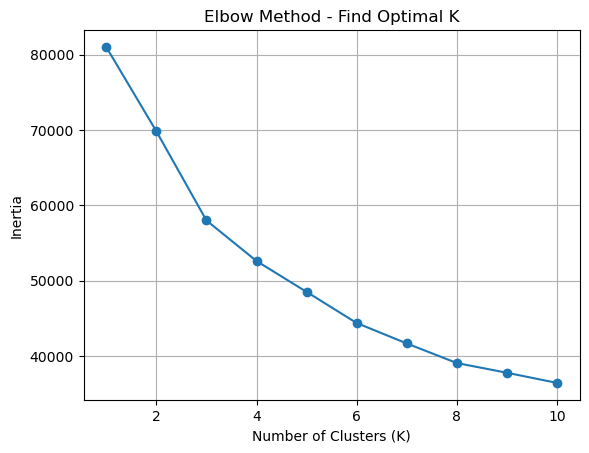

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

    

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster to the original data
df['Cluster'] = clusters


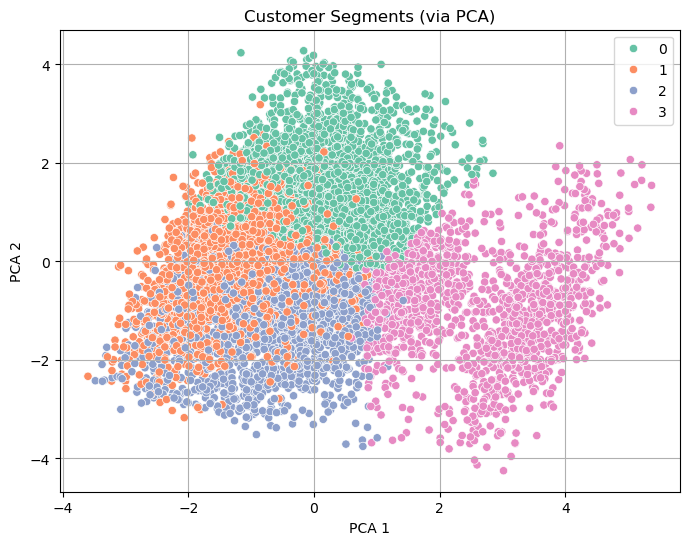

In [25]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Customer Segments (via PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [27]:
df.groupby('Cluster')[features].mean()

,Customer_Age,Months_on_book,Total_Relationship_Count,Total_Trans_Amt,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Cluster,,,,,,,,
0,38.794182,29.088208,4.291211,3539.033469,63.886769,0.821452,0.762471,0.320100
1,48.294684,37.671829,3.784429,2291.781917,44.382587,0.612098,0.513363,0.143872
2,52.787860,41.779007,4.110022,3797.690800,66.136895,0.804180,0.808093,0.373092
3,45.554427,35.346154,2.068215,11464.970247,99.678520,0.771996,0.720343,0.171761
